In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

from scipy import stats

In [2]:
df = pd.read_csv('./results/mtcnn-20220405-220939.tsv', sep='\t', header=0, parse_dates=["Timestamp"])
df_load = pd.read_csv('./results/mtcnn-20220405-220939-load.tsv', sep='\t', header=0, parse_dates=["Timestamp"])
df_meta = pd.read_csv('./results/mtcnn-20220405-220939-metadata.tsv', sep='\t', header=0)

In [3]:
df_meta

,Python,CPU,GPUs
0,3.8.8.final.0 (64 bit),AMD Ryzen 7 2700X Eight-Core Processor,"['device: 0, name: NVIDIA GeForce GTX 1080 Ti,..."


In [4]:
df_load

,Timestamp,CPU_Load,RAM_Avail
0,2022-04-05 22:09:39.061731,19.2,3691565056
1,2022-04-05 22:28:04.611732,17.1,3619872768


In [5]:
def plot_data_over_time(time, data, label):
    plt.plot(time, data)
    plt.xlabel('Time') 
    plt.ylabel(label)
    plt.grid(True)
    plt.show()

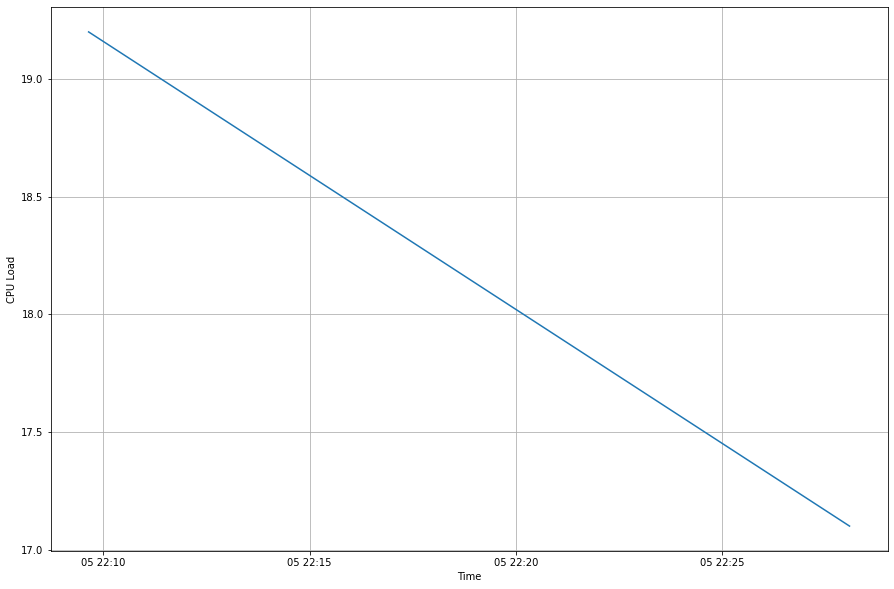

In [6]:
plot_data_over_time(df_load['Timestamp'], df_load['CPU_Load'], 'CPU Load')

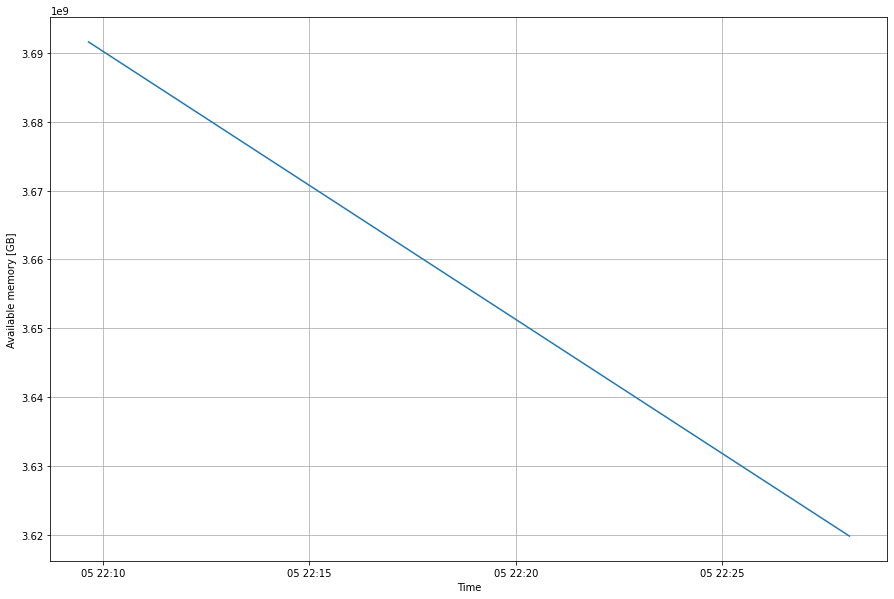

In [7]:
plot_data_over_time(df_load['Timestamp'], df_load['RAM_Avail'], 'Available memory [GB]')

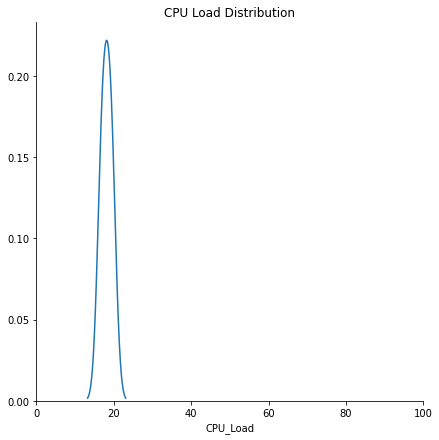

In [8]:
sns.FacetGrid(df_load, height=6).map(sns.kdeplot, 'CPU_Load').add_legend()
plt.title('CPU Load Distribution')
plt.xlim(0, 100)
plt.show()

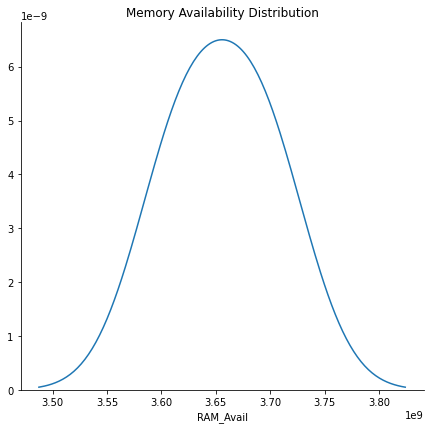

In [9]:
sns.FacetGrid(df_load, height=6).map(sns.kdeplot, 'RAM_Avail').add_legend()
plt.title('Memory Availability Distribution')
plt.show()

In [10]:
df

,Timestamp,Speed,Precision,Recall,F1_Score,Ious,Positives,False_Positives,Negatives,Num_Of_Faces,Predicted,Ground_Truth
0,2022-04-05 22:09:40.053732,429803600,1.000000,1.000000,1.000000,"[0.8915242805755396, 0.8778703002775675, 0.771...",8,0,0,8,"[(176.0, 141.0, 255.0, 245.0), (785.0, 190.0, ...","[(909.0, 335.0, 974.0, 418.0), (786.0, 187.0, ..."
1,2022-04-05 22:09:40.369231,310522600,0.000000,0.000000,0.000000,[],0,0,1,1,[],"[(547.0, 1228.0, 688.0, 1333.0)]"
2,2022-04-05 22:09:40.602233,226211600,1.000000,1.000000,1.000000,"[0.8058647841433614, 0.8445652173913043]",2,0,0,2,"[(551.0, 117.0, 604.0, 174.0), (459.0, 48.0, 4...","[(459.0, 45.0, 499.0, 91.0), (551.0, 107.0, 60..."
3,2022-04-05 22:09:40.996733,268497800,1.000000,0.112903,0.202899,"[0.8086548488008342, 0.7382198952879581, 0.830...",7,0,55,62,"[(61.0, 494.0, 99.0, 541.0), (254.0, 496.0, 29...","[(82.0, 278.0, 90.0, 287.0), (96.0, 272.0, 106..."
4,2022-04-05 22:09:41.331732,315591500,1.000000,1.000000,1.000000,"[0.8859470468431772, 0.8551800965466023, 0.807...",8,0,0,8,"[(268.0, 70.0, 317.0, 128.0), (410.0, 89.0, 45...","[(104.0, 77.0, 152.0, 135.0), (199.0, 78.0, 24..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3221,2022-04-05 22:27:53.269732,368000400,1.000000,1.000000,1.000000,[0.7898197662903546],1,0,0,1,"[(457.0, 159.0, 584.0, 316.0)]","[(452.0, 146.0, 587.0, 333.0)]"
3222,2022-04-05 22:27:53.731232,454929100,1.000000,1.000000,1.000000,"[0.767156406918356, 0.7021690767519466]",2,0,0,2,"[(715.0, 421.0, 797.0, 531.0), (331.0, 415.0, ...","[(324.0, 408.0, 417.0, 524.0), (712.0, 408.0, ..."
3223,2022-04-05 22:27:54.198731,376289300,0.964286,1.000000,0.981818,"[0.8267477203647416, 0.875, 0.8185483870967742...",27,1,0,27,"[(736.0, 501.0, 768.0, 540.0), (521.0, 479.0, ...","[(70.0, 307.0, 102.0, 343.0), (121.0, 301.0, 1..."
3224,2022-04-05 22:27:54.361231,145152700,1.000000,0.857143,0.923077,"[0.8199643493761141, 0.7321225879682179, 0.959...",6,0,1,7,"[(855.0, 82.0, 901.0, 142.0), (113.0, 109.0, 1...","[(451.0, 94.0, 478.0, 121.0), (394.0, 99.0, 40..."


In [11]:
df.describe()

,Speed,Precision,Recall,F1_Score,Positives,False_Positives,Negatives,Num_Of_Faces
count,3.226000e+03,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000,3226.000000
mean,2.988870e+08,0.818584,0.690175,0.709836,4.829820,0.459392,7.478921,12.308741
std,1.432363e+08,0.321229,0.370292,0.339619,10.732831,0.961133,33.861611,39.822258
min,7.914120e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.042586e+08,0.765837,0.400000,0.500000,1.000000,0.000000,0.000000,1.000000
50%,2.731390e+08,1.000000,0.954545,0.822479,2.000000,0.000000,1.000000,3.000000
75%,3.534286e+08,1.000000,1.000000,1.000000,5.000000,1.000000,4.000000,9.000000
max,2.101239e+09,1.000000,1.000000,1.000000,259.000000,13.000000,624.000000,709.000000


In [12]:
sorted_by_recall = df.sort_values(by=['Recall'], ignore_index=True)

In [13]:
recall = []
precision = []

for i in range(len(sorted_by_recall)):
    recall.append(sorted_by_recall['Recall'][i])
    precision.append(sorted_by_recall['Precision'][i])

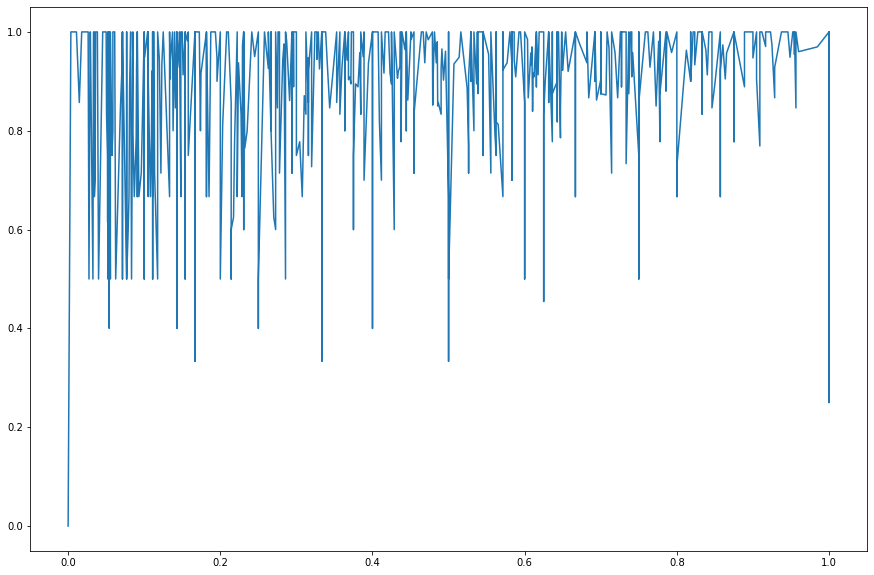

In [14]:
plt.plot(recall, precision)

In [15]:
mrec = np.concatenate(([0.], recall, [1.]))
mpre = np.concatenate(([0.], precision, [0.]))

# compute the precision envelope
for i in range(mpre.size - 1, 0, -1):
    mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

# to calculate area under PR curve, look for points
# where X axis (recall) changes value
i = np.where(mrec[1:] != mrec[:-1])[0]

# and sum (\Delta recall) * prec
ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])

In [16]:
ap

1.0